In [420]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from IPython.display import Image
import os
%matplotlib inline  

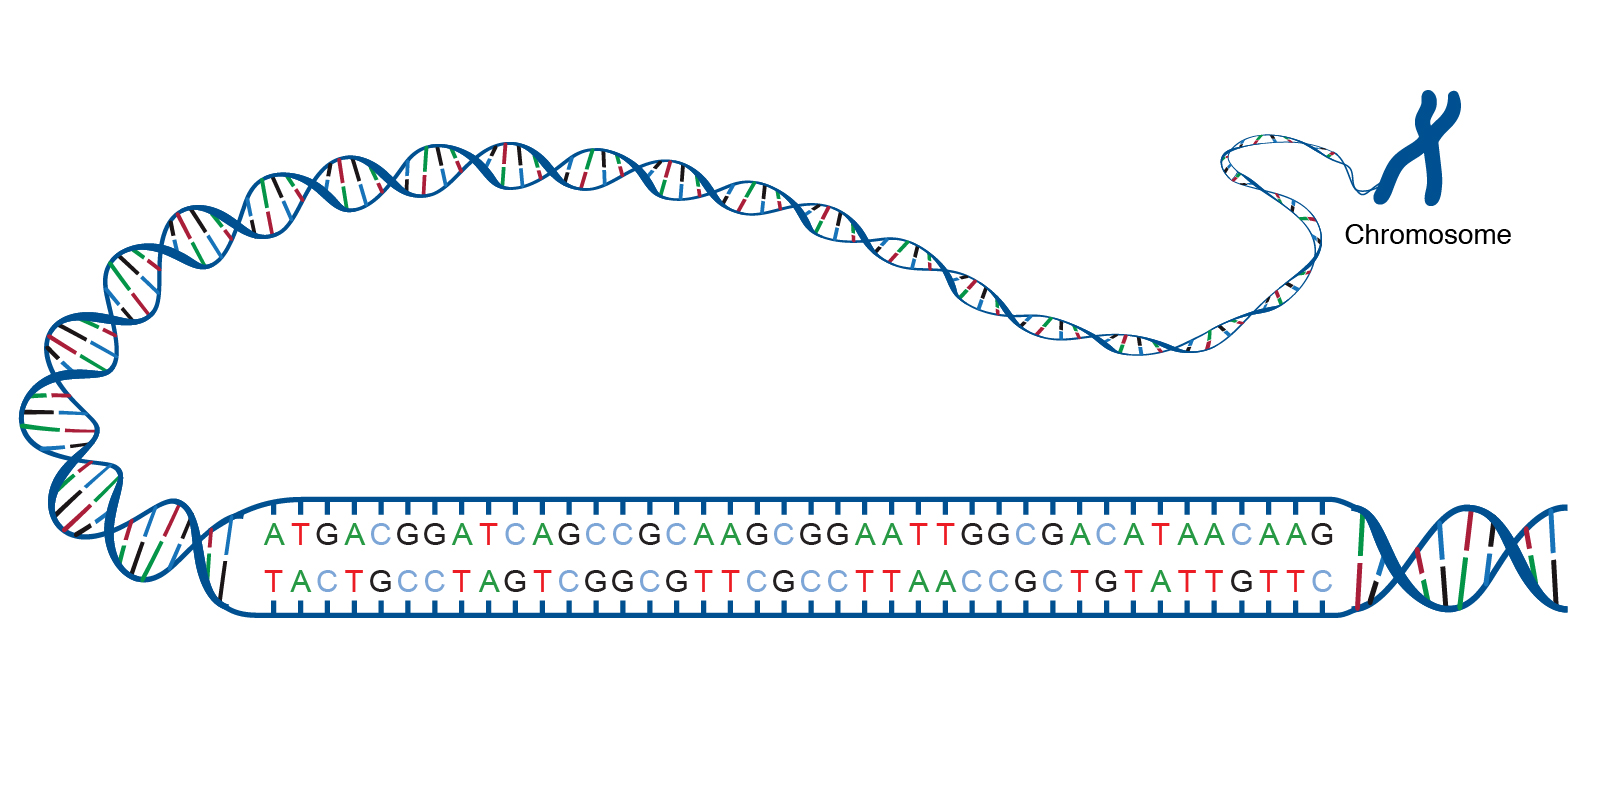

In [421]:
Image ('dnaStrand.jpeg')

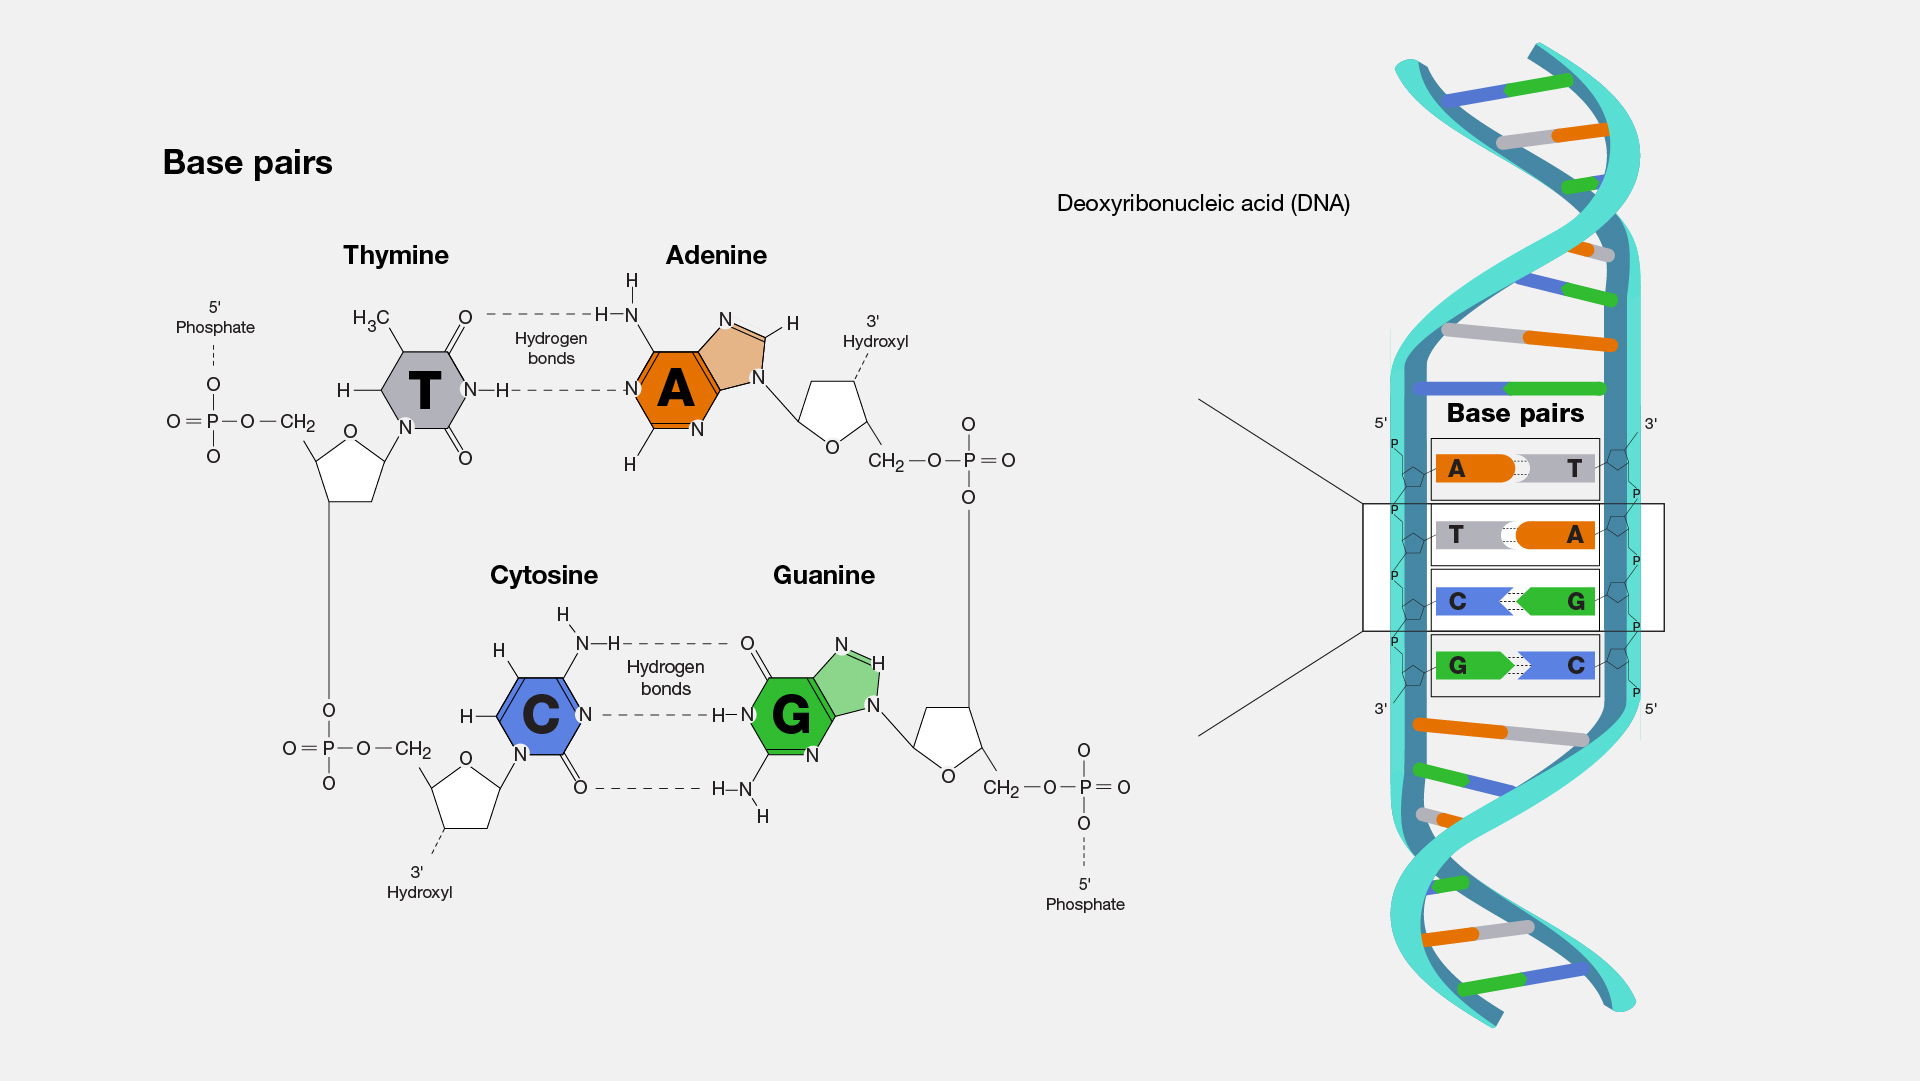

In [422]:
Image ('Base-pair.jpeg')

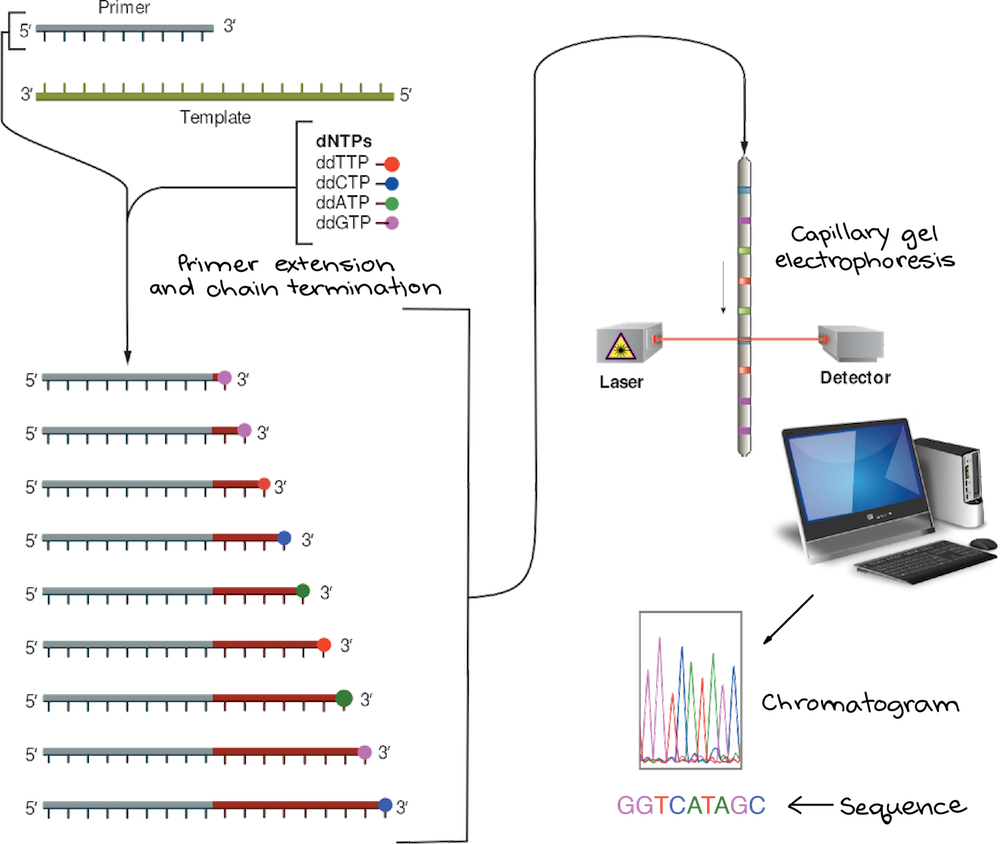

In [423]:
Image ('SangerSequencing.png')

In [424]:
humanDF= pd.read_table ('human.txt.zip')
chimpDF= pd.read_table ('chimpanzee.txt.zip')
dogDF= pd.read_table ('dog.txt.zip')

print ("Human DataFrame: shape",humanDF.shape)
humanDF.sample(5)

Human DataFrame: shape (4380, 2)


,sequence,class
1922,ATGCTAGGCCGATTTCAACCCTTCTCCTTGGTCCGGAGTTTCAGAC...,3
4139,ATGCCGGGCCCGCTAGGGCTGCTCTGCTTCCTCGCCCTGGGGCTGC...,0
3322,ATGCAGGATGTCCAAGGCCCCCGTCCCGGAAGCCCCGGGGATGCTG...,5
3296,ATGTCTTTGGTGGACTTGGGAAAGAGGTTGCTAGAAGCAGCAAGAA...,6
1693,ATGTGGCCATCGCAGCTACTAATTTTCATGATGCTCTTAGCTCCAA...,0


# Assumption:  The data generated from the Sanger Sequencing process has a high degree of accuracy.

In [425]:
print ("Chimpanzee DataFrame: shape",chimpDF.shape)
chimpDF.sample(5)

Chimpanzee DataFrame: shape (1682, 2)


,sequence,class
164,ATGATGGACAACAGAGGCAACTCTAGTCTACCTGACAAACTTCCTA...,6
1307,ATGGCGTTCGCGCTGCTGCGGCCCGTCGGCGCGCACGTGCTGTACC...,6
720,ATGCCGAATATCAAAATCTTCAGCGGCAGCTCCCACCAGGACTTAT...,3
971,ATGGCCCTGTATCAGAGGTGGCGGTGTCTCCGGCTCCAAGGTTTAC...,3
414,ATGGCGGTGGCGGCGGCAGCGGCGGCGGGACCCGTGTTCTGGAGGC...,4


In [426]:
print ("Dog DataFrame: shape",dogDF.shape)
dogDF.sample(5)

Dog DataFrame: shape (820, 2)


,sequence,class
123,ATGGAAGGGCTGGTGGCTCAGTGCTCCGCGAGGCTGTTGCAGCAGG...,3
252,ATGGCGGCCCTGATGTTGGAAGATGGGTCGGTCCTGCGGGGCCAGC...,3
185,ATGTCCACCAAAGGAGCCGTCCAGCATGCTTTGCACACCGCACGCC...,0
344,ATGCCCAGCAAAACCAAGTACAACCTTGTGGACGATGGGCACGACC...,4
492,ATGCCTCACAGCTCCGACAGCAGCGACTCCAGCTTCAGCCGCTCTC...,6


In [427]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def genKmers(sequence, segmentSize=6):
    return [sequence[x:x + segmentSize].lower() for x in range(len(sequence) - segmentSize + 1)]

In [428]:
print (humanDF['sequence'][0],"\n\n",humanDF['sequence'][1])

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG 

 ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAGGCCTACCCGCCGCAGTACTGATCATTCTATTTCCCCCTCTATTGATCCCCACCTCCAAATATCTCATCAACAACCGACTAATCACCACCCAACAATGACTAATCAAACTAACCTCAAAACAAATGATAACCATACACAACACTAAAGGACGAACCTGATCTCTTATACTAGTATCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGCCTCACTCATTTACACCAACCACCCAACTATCTATAAACCTAGCCATGGCCATCCCCTTATGAGCGGGCACAGTGATTATAGGCTTTCGCTCTAAGATTAAAAATGCCCTAGCCCACTTCTTACCACAAGGCACACCTACACCCCTTATCCCCATACTAGTTATTATCGAAACCATCAGCCTACTCATTCAACCAATAGCCCTGGCCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACCCTAGCAATATCAACCATTAACCTTCCCTCTACACTTATCATCTTCACAATTCTAATTCTACTGACTATCCTAGAAATCGCTGTCGCCTTAATCCAAGCCTACGTTTTCACACTTCTAGTAAGCCTCTACCTGCACGACAACACATAA


In [429]:
humanDF['sequence'][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

In [430]:
humanDF['sequence'][0]
genKmers(humanDF['sequence'][0])

['atgccc',
 'tgcccc',
 'gcccca',
 'ccccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaat',
 'taaata',
 'aaatac',
 'aatact',
 'atacta',
 'tactac',
 'actacc',
 'ctaccg',
 'taccgt',
 'accgta',
 'ccgtat',
 'cgtatg',
 'gtatgg',
 'tatggc',
 'atggcc',
 'tggccc',
 'ggccca',
 'gcccac',
 'cccacc',
 'ccacca',
 'caccat',
 'accata',
 'ccataa',
 'cataat',
 'ataatt',
 'taatta',
 'aattac',
 'attacc',
 'ttaccc',
 'tacccc',
 'accccc',
 'ccccca',
 'ccccat',
 'cccata',
 'ccatac',
 'catact',
 'atactc',
 'tactcc',
 'actcct',
 'ctcctt',
 'tcctta',
 'ccttac',
 'cttaca',
 'ttacac',
 'tacact',
 'acacta',
 'cactat',
 'actatt',
 'ctattc',
 'tattcc',
 'attcct',
 'ttcctc',
 'tcctca',
 'cctcat',
 'ctcatc',
 'tcatca',
 'catcac',
 'atcacc',
 'tcaccc',
 'caccca',
 'acccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaaa',
 'taaaaa',
 'aaaaat',
 'aaaata',
 'aaatat',
 'aatatt',
 'atatta',
 'tattaa',
 'attaaa',
 'ttaaac',
 'taaaca',
 'aaacac',
 'aacaca',
 'acacaa',
 'cacaaa',
 'acaaac',

In [431]:
humanDF["segments"]=humanDF.apply(lambda x: genKmers(x["sequence"]),axis=1)
humanDF.head()
chimpDF['segments'] = chimpDF.apply(lambda x: genKmers(x['sequence']), axis=1)
chimpDF = chimpDF.drop('sequence', axis=1)
dogDF['segments'] = dogDF.apply(lambda x: genKmers(x['sequence']), axis=1)
dogDF = dogDF.drop('sequence', axis=1)
humanDF=humanDF.drop("sequence",axis=1)
humanDF.head()

,class,segments
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [432]:
humanDF["segments"][2]

['atgtgt',
 'tgtgtg',
 'gtgtgg',
 'tgtggc',
 'gtggca',
 'tggcat',
 'ggcatt',
 'gcattt',
 'catttg',
 'atttgg',
 'tttggg',
 'ttgggc',
 'tgggcg',
 'gggcgc',
 'ggcgct',
 'gcgctg',
 'cgctgt',
 'gctgtt',
 'ctgttt',
 'tgtttg',
 'gtttgg',
 'tttggc',
 'ttggca',
 'tggcag',
 'ggcagt',
 'gcagtg',
 'cagtga',
 'agtgat',
 'gtgatg',
 'tgatga',
 'gatgat',
 'atgatt',
 'tgattg',
 'gattgc',
 'attgcc',
 'ttgcct',
 'tgcctt',
 'gccttt',
 'cctttc',
 'ctttct',
 'tttctg',
 'ttctgt',
 'tctgtt',
 'ctgttc',
 'tgttca',
 'gttcag',
 'ttcagt',
 'tcagtg',
 'cagtgt',
 'agtgtc',
 'gtgtct',
 'tgtctg',
 'gtctga',
 'tctgag',
 'ctgagt',
 'tgagtg',
 'gagtgc',
 'agtgct',
 'gtgcta',
 'tgctat',
 'gctatg',
 'ctatga',
 'tatgaa',
 'atgaag',
 'tgaaga',
 'gaagat',
 'aagatt',
 'agattg',
 'gattgc',
 'attgca',
 'ttgcac',
 'tgcaca',
 'gcacac',
 'cacaca',
 'acacag',
 'cacaga',
 'acagag',
 'cagagg',
 'agaggt',
 'gaggtc',
 'aggtcc',
 'ggtcca',
 'gtccag',
 'tccaga',
 'ccagat',
 'cagatg',
 'agatgc',
 'gatgca',
 'atgcat',
 'tgcatt',
 'gcattc',

In [433]:
human_texts=list(humanDF["segments"])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_h = humanDF.iloc[:, 0].values  

In [434]:
human_texts[2]

'atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accgg

In [435]:
y_h

array([4, 4, 3, ..., 6, 6, 6])

In [436]:
chimp_texts = list(chimpDF['segments'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 0].values                       # y_c for chimp

dog_texts = list(dogDF['segments'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dogDF.iloc[:, 0].values       

In [437]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [438]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


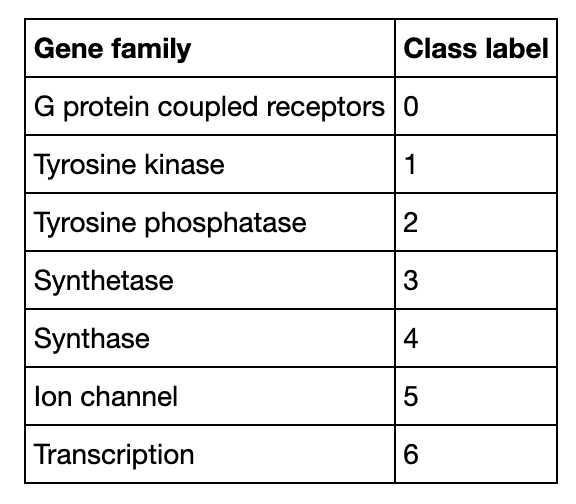

In [439]:
Image ('geneFamilyClassLabel.png')

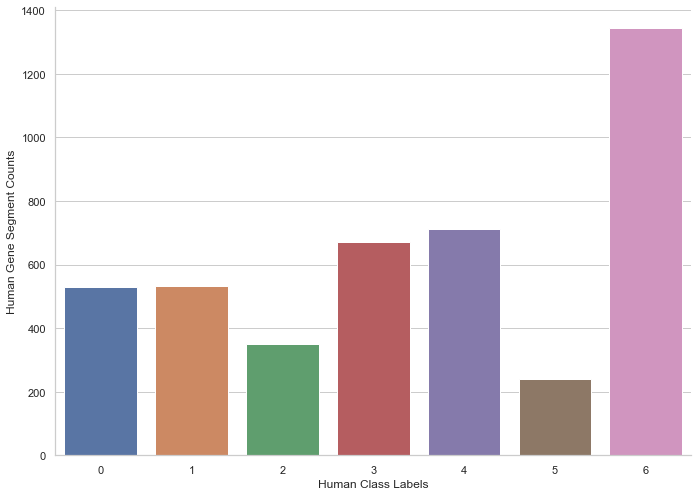

In [440]:
plotDF= pd.DataFrame()

plotDF= humanDF.groupby(['class']).size().reset_index()
plotDF.rename (columns={0 : 'segCounts'},inplace=True)

ax=sns.catplot(x='class', y="segCounts",kind='bar', data=plotDF,height=7,aspect=1.4);
ax.set_axis_labels("Human Class Labels", "Human Gene Segment Counts");

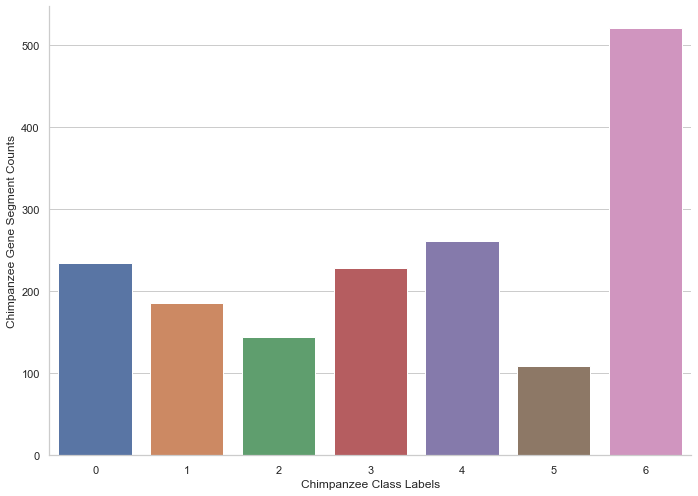

In [441]:
plotDF= chimpDF.groupby(['class']).size().reset_index()
plotDF.rename (columns={0 : 'segCounts'},inplace=True)

ax=sns.catplot(x='class', y="segCounts",kind='bar', data=plotDF,height=7,aspect=1.4);
ax.set_axis_labels("Chimpanzee Class Labels", "Chimpanzee Gene Segment Counts");

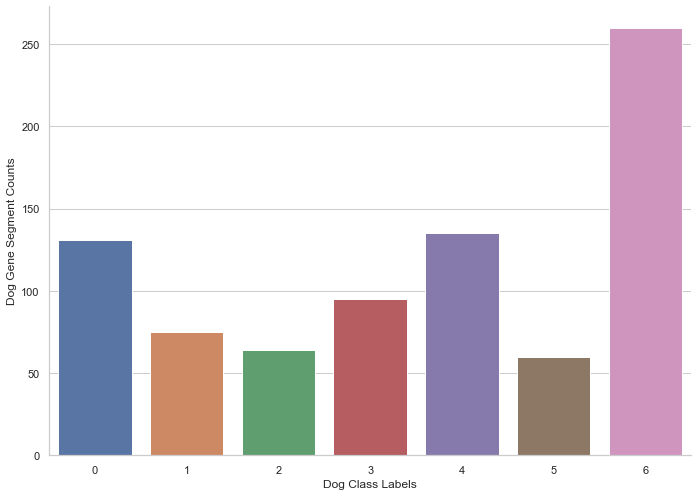

In [442]:
plotDF= dogDF.groupby(['class']).size().reset_index()
plotDF.rename (columns={0 : 'segCounts'},inplace=True)

ax=sns.catplot(x='class', y="segCounts",kind='bar', data=plotDF,height=7,aspect=1.4);
ax.set_axis_labels("Dog Class Labels", "Dog Gene Segment Counts");

In [443]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y_h,test_size=0.2,random_state=42)

In [444]:
print(x_train.shape)
print(x_test.shape)

(3504, 232414)
(876, 232414)


In [445]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously

classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [446]:
y_pred = classifier.predict(x_test)

In [447]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [106]:
# Predict the chimpanzee and dog sequences
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

In [107]:
# performance on chimpanzee genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [108]:
# performance on dog genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925
